Assignment -1 submitted by Pawan negi (174010003)
==========================

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

All functions
=======


In [28]:
def lagrange_polynomial(index , x , xi=-10000):
    val = 1 ;
    xval = x[index]
    if not (xi == -10000):
        xval = xi
    for i in range (len(x)):
        if not(abs(x[index] - x[i]) < 0.0001 ):
            val = val * (xval - x[i]) / (x[index] - x[i])
    
    return val

def lagrange_polynomial_1dash(index , x , xi=-10000):
    val = 1 ;
    xval = x[index]
    if not (xi == -10000):
        xval = xi
    mysum = 0.0
    dosum = True
    for i in range (len(x)):
        if not(abs(x[index] - x[i]) < 0.001 ):
            if (abs(xval - x[i]) < 0.001):
                val = val * 1.0 / (x[index] - x[i])
                dosum = False 
                mysum = 1.0
                continue
            val = val * (xval - x[i]) / (x[index] - x[i])
            if dosum:
                mysum += 1. / (xval - x[i])
        
    
    return val * mysum

def lagrange_polynomial_2dash(index , x , xi=-10000):
    pass

def my_func(x):
    return 1 / (1 + np.cos(np.pi / 2 * x))

def my_func_dash(x):
    return (np.pi/2 * np.sin(np.pi / 2 * x)) / (1 + np.cos(np.pi / 2 * x))**2

def interpolate_equispaced(N ,func ,  isplot = True):
    x = np.linspace(-1.,1. , N)
    y = func(x)
    
    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial(j , x , xnew[i]) * y[j]
            
    if (isplot):
        plt.plot(x,y , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
        
    return L2_Norm(xnew , ynew , my_func)  

def interpolate_equispaced_1dash(N ,func ,funcdash,  isplot = True):
    x = np.linspace(-1.,1. , N)
    y = func(x)
    ydash = funcdash(x)
    
    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial_1dash(j , x , xnew[i]) * y[j]
       
    print ydash
    print ynew
    if (isplot):
        plt.plot(x,ydash , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
        
    return L2_Norm(xnew , ynew , funcdash)

def lglpoints(points):
    N = points - 1
    N1=N+1;
    theta = np.linspace(0,np.pi,N1)
    x=np.cos(theta)
    P=np.zeros((N1,N1))
    xold=2
    while (max(abs(x-xold))>0.0001) :
        xold=x;
        P[:,0]=1;    
        P[:,1]=x;
        for k in range(2,N1):
            P[:,k]= ((2*k-1.)*x*P[:,k-1]-(k-1.)*P[:,k-2])/k
        
        x=xold - ( x*P[:,N]-P[:,N-1] )/( N*P[:,N] )  
    
    w=2./(N*N1*P[:,N]**2)
    
    return x , w

def lgpoints(points):
    N = points
    k = np.linspace(1,N , N)
    x = (1. - 1./8/N**2 + 1./8/N**3)* np.cos(np.pi * (4 * k - 1)/(4 * N + 2))
    N1=N+1;

    P=np.zeros((N,N1))
    P[:,0]=1;    
    P[:,1]=x;
    for k in range(2,N1):
        P[:,k]= ((2*k-1.)*x*P[:,k-1]-(k-1.)*P[:,k-2])/k

    w = 2.* (1.-x**2)/(N**2 * P[:,N-1]**2)
    
    return x , w

def interpolation_lgl(N , func , isplot= True):
    x , w = lglpoints(N)
    y = func(x)

    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial(j , x , xnew[i]) * y[j]
            
    if (isplot):
        plt.plot(x,y , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
        
    return L2_Norm(xnew , ynew , my_func) 

def interpolation_lgl_1dash(N , func ,funcdash, isplot= True):
    x , w = lglpoints(N)
    y = func(x)
    ydash = funcdash(x)
    
    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial_1dash(j , x , xnew[i]) * y[j]
            
    if (isplot):
        plt.plot(x,ydash , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
        
    return L2_Norm(xnew, ynew , funcdash) 
     
def interpolation_lg(N , func , isplot = True):
    x , w = lgpoints(N)
    y = func(x)

    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial(j , x , xnew[i]) * y[j]
       
    if (isplot):
        plt.plot(x,y , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
    return L2_Norm(xnew , ynew , my_func)
    

def interpolation_lg_1dash(N , func ,funcdash, isplot= True):
    x , w = lgpoints(N)
    y = func(x)
    ydash = funcdash(x)
    
    xnew = np.linspace(-1.,1. , N*2)
    ynew = xnew.copy() * 0.0
    
    for i in range(len(xnew)):
        for j in range(len(x)):
            ynew[i] += lagrange_polynomial_1dash(j , x , xnew[i]) * y[j]
            
    if (isplot):
        plt.plot(x,ydash , '-o')
        plt.plot(xnew,ynew)
        plt.legend(['exact' , 'interpolated']) 
        
    return L2_Norm(xnew, ynew , funcdash) 

def L2_Norm(x , y , func):
    yexact = func(x)
    return np.sqrt(sum((yexact - y)**2))/np.sqrt(sum((yexact)**2))

def lgl_integration(N , func):
    exact = 1.27323954473516
    x , w = lglpoints(N)
    y = func(x)

    mysum = 0.0
    for i in range(len(x)):
        val = 0.0
        for j in range(len(x)):
            val += lagrange_polynomial(j , x , x[i])
        mysum += val * y[i] * w[i]
        
    error = abs(exact - mysum) / exact
    return mysum , error

def lg_integration(N , func):
    exact = 1.27323954473516
    x , w = lgpoints(N)
    y = func(x)

    mysum = 0.0
    for i in range(len(x)):
        val = 0.0
        for j in range(len(x)):
            val += lagrange_polynomial(j , x , x[i])
        mysum += val * y[i] * w[i]
        
    error = abs(exact - mysum) / exact
    return mysum , error


Uniformly spaced points interpolation
====================

- points are uniformly spaced
- the interpolation is done using lagrange cardinal polynomials

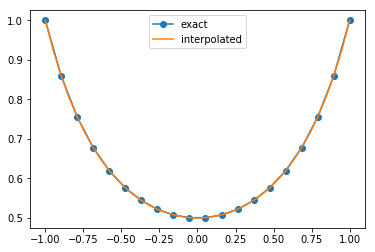

In [3]:
interpolate_equispaced(20 , my_func);

Legendre Gauss Labatto Points
================

- The points are calculated using the labatto polynomial
- To find the roots Newtons Rapson methos is used
- The intial guess is taken as points for cos(x) over the interval [-1,1].
- The following site has been refered for the calculation of roots
    https://in.mathworks.com/matlabcentral/fileexchange/4775-legende-gauss-lobatto-nodes-and-weights
- The lagrange cardinal polynomials are used for interpolation

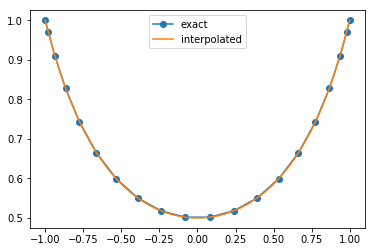

In [4]:
interpolation_lgl(20 , my_func);
    


Legendre Gauss points
=====================

- The points are evaluated using the formula \begin{equation} r_{n,k} = \bigg(1 - \frac{1}{8n^2} + \frac{1}{8n^3} \bigg) cos\bigg(\pi \frac{4k - 1}{4n + 2}\bigg) \end{equation}

https://math.stackexchange.com/questions/12160/roots-of-legendre-polynomial

- The weights are just the integration of the polynomials.
- The lagrange cardinal polynomials are used for interpolation


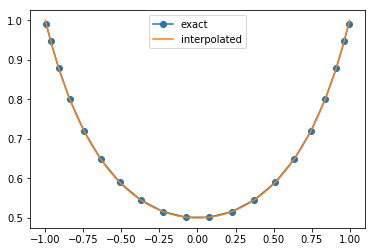

In [5]:
interpolation_lg(20 , my_func);

Error plot for different type of points taken
========================

- The error diverges for uniform points after some time. Thus it is not a good way of approximation.
- In LG points the end points are not taken thus we need extra mechanism to take care to that while calculations.
- In LGL points end points are covered thus it is a best approximation.

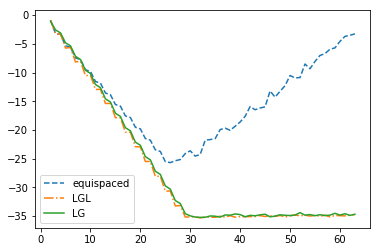

In [6]:
N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolate_equispaced(i , my_func , False)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error, '--');

N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolation_lgl(i , my_func , False)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error , '-.');

N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolation_lg(i , my_func , False)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error);

plt.legend(['equispaced' , 'LGL' , 'LG']);

derivative interpolation for uniform points
==========================

[-1.57079633 -1.14236889 -0.84662752 -0.63416315 -0.4757214  -0.35312449
 -0.25454761 -0.17192084 -0.09942091 -0.03253988  0.03253988  0.09942091
  0.17192084  0.25454761  0.35312449  0.4757214   0.63416315  0.84662752
  1.14236889  1.57079633]
[-1.57079524 -1.34117887 -1.15142402 -0.99299989 -0.85945143 -0.74583089
 -0.64829963 -0.56384512 -0.49007712 -0.42507871 -0.36729619 -0.31545653
 -0.26850481 -0.2255562  -0.18585861 -0.14876315 -0.11370055 -0.08016174
 -0.04768166 -0.01582523  0.01582523  0.04768166  0.08016174  0.11370055
  0.14876315  0.18585861  0.2255562   0.26850481  0.31545653  0.36729619
  0.42507871  0.49007712  0.56384512  0.64829963  0.74583089  0.85945143
  0.99299989  1.15142402  1.34117887  1.57079524]


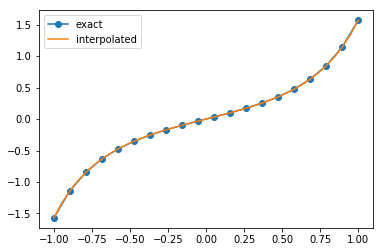

In [29]:
interpolate_equispaced_1dash(20 , my_func , my_func_dash);

derivative interpolation for LGL points
==========================

5.7999887051129146e-09

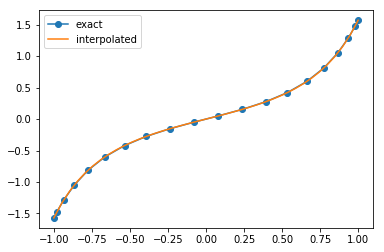

In [30]:
interpolation_lgl_1dash(20 , my_func , my_func_dash)

derivative interpolation for LG points
==========================

0.00457228707087138

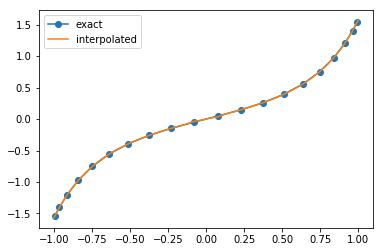

In [31]:
interpolation_lg_1dash(20 , my_func , my_func_dash)

Error plot for different type of points taken
==========================

- The behaviour is similar to function interpolation
- The error diverges for uniform points after some time. Thus it is not a good way of approximation.
- In LG points the end points are not taken thus we need extra mechanism to take care to that while calculations.
- In LGL points end points are covered thus it is a best approximation.

/Users/pawannegi/.edm/envs/edm/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/Users/pawannegi/.edm/envs/edm/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


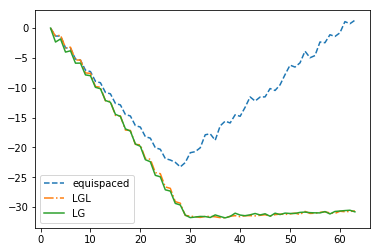

In [10]:
N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolate_equispaced_1dash(i , my_func , my_func_dash , False);
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error, '--');

N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolation_lgl_1dash(i , my_func , my_func_dash , False)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error , '-.');

N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    error = interpolation_lg_1dash(i , my_func , my_func_dash , False)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error);

plt.legend(['equispaced' , 'LGL' , 'LG']);

Error in integration by sampling in LGL and LG points
==============================

- Error while taking LGL points are lower as it consists of end points.

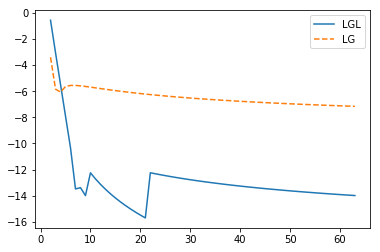

In [11]:
N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    val , error = lgl_integration(i , my_func)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error);  

N = []
logl2error = []
for i in range(2 , 64):
    N.append(i)
    val , error = lg_integration(i , my_func)
    logl2error.append(np.log(error))
    
plt.plot(N , logl2error , '--');

plt.legend(['LGL' , 'LG']);